# 수치입력 다중클래스분류모델

In [1]:
import numpy as np
import random
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


### 데이터셋 준비

In [2]:
# 데이터셋 생성
x_train = np.random.random((1000, 12))
y_train = np.random.randint(10, size=(1000, 1))
x_test = np.random.random((100, 12))
y_test = np.random.randint(10, size=(100, 1))

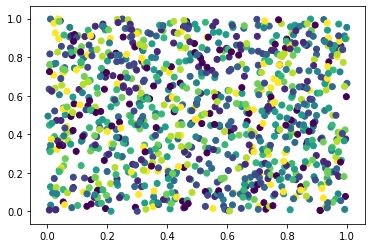

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터셋 확인 (2차원)
plot_x = x_train[:, 0]
plot_y = x_train[:, 1]
plot_color = y_train.reshape(1000,)

plt.scatter(plot_x, plot_y, c=plot_color)

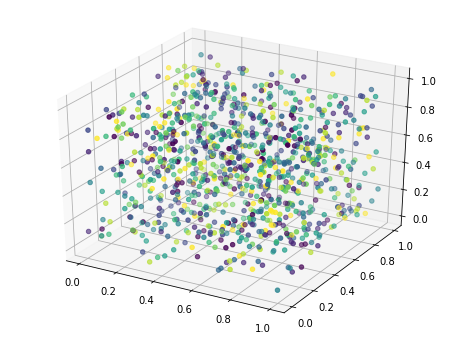

In [4]:
# 데이터셋 확인 (3차원)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

plot_x = x_train[:, 0]
plot_y = x_train[:, 1]
plot_z = x_train[:, 2]
plot_color = y_train.reshape(1000,)

ax.scatter(plot_x, plot_y, plot_z, c=plot_color)
plt.show()

In [5]:
# One-hot Encoding
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

## 1. 퍼셉트론 신경망 모델

In [7]:
# 모델 구성하기
model1 = Sequential()
model1.add(Dense(10, input_dim=12, activation='softmax'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                130       
Total params: 130
Trainable params: 130
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 모델 학습과정 설정
model1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [10]:
# 모델 학습시키기
hist1 = model1.fit(x_train, y_train, epochs=1000, batch_size=100)

W0905 10:53:07.629687 14328 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0905 10:53:07.680776 14328 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/1000


InternalError: 2 root error(s) found.
  (0) Internal: Blas GEMM launch failed : a.shape=(100, 12), b.shape=(12, 10), m=100, n=10, k=12
	 [[{{node dense_2/MatMul}}]]
	 [[loss_1/mul/_57]]
  (1) Internal: Blas GEMM launch failed : a.shape=(100, 12), b.shape=(12, 10), m=100, n=10, k=12
	 [[{{node dense_2/MatMul}}]]
0 successful operations.
0 derived errors ignored.

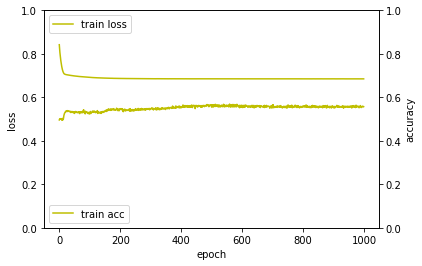

In [16]:
# 학습과정 살펴보기
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])
loss_ax.plot(hist1.history['loss'], 'y', label='train loss')
acc_ax.plot(hist1.history['acc'], 'y', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [17]:
# 모델 평가하기
loss_and_metrics = model1.evaluate(x_test, y_test, batch_size=50)
print('loss_and_metrics : ' + str(loss_and_metrics))

100/100 [==============================] - 0s 392us/step
loss_and_metrics : [0.6884236037731171, 0.510000005364418]


## 2. 다층퍼셉트론 신경망 모델

In [19]:
# 모델 구성하기
model2 = Sequential()
model2.add(Dense(64, input_dim=12, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                832       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


In [20]:
# 모델 학습과정 설정
model2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [21]:
# 모델 학습시키기
hist2 = model2.fit(x_train, y_train, epochs=1000, batch_size=100)

Epoch 1/1000
1000/1000 [==============================] - 0s 193us/step - loss: 0.6941 - acc: 0.5100
Epoch 2/1000
1000/1000 [==============================] - 0s 35us/step - loss: 0.6902 - acc: 0.5190
Epoch 3/1000
1000/1000 [==============================] - 0s 33us/step - loss: 0.6902 - acc: 0.5280
Epoch 4/1000
1000/1000 [==============================] - 0s 34us/step - loss: 0.6890 - acc: 0.5310
Epoch 5/1000
1000/1000 [==============================] - 0s 30us/step - loss: 0.6875 - acc: 0.5510
Epoch 6/1000
1000/1000 [==============================] - 0s 32us/step - loss: 0.6869 - acc: 0.5520
Epoch 7/1000
1000/1000 [==============================] - 0s 31us/step - loss: 0.6873 - acc: 0.5530
Epoch 8/1000
1000/1000 [==============================] - 0s 30us/step - loss: 0.6857 - acc: 0.5590
Epoch 9/1000
1000/1000 [==============================] - 0s 31us/step - loss: 0.6851 - acc: 0.5680
Epoch 10/1000
1000/1000 [==============================] - 0s 30us/step - loss: 0.6848 - acc: 0.578

1000/1000 [==============================] - 0s 38us/step - loss: 0.6436 - acc: 0.6420
Epoch 163/1000
1000/1000 [==============================] - 0s 37us/step - loss: 0.6433 - acc: 0.6440
Epoch 164/1000
1000/1000 [==============================] - 0s 36us/step - loss: 0.6431 - acc: 0.6470
Epoch 165/1000
1000/1000 [==============================] - 0s 40us/step - loss: 0.6423 - acc: 0.6560
Epoch 166/1000
1000/1000 [==============================] - 0s 37us/step - loss: 0.6438 - acc: 0.6430
Epoch 167/1000
1000/1000 [==============================] - 0s 41us/step - loss: 0.6425 - acc: 0.6350
Epoch 168/1000
1000/1000 [==============================] - 0s 38us/step - loss: 0.6424 - acc: 0.6500
Epoch 169/1000
1000/1000 [==============================] - 0s 37us/step - loss: 0.6412 - acc: 0.6540
Epoch 170/1000
1000/1000 [==============================] - 0s 38us/step - loss: 0.6424 - acc: 0.6430
Epoch 171/1000
1000/1000 [==============================] - 0s 37us/step - loss: 0.6424 - acc: 0.

1000/1000 [==============================] - 0s 38us/step - loss: 0.6041 - acc: 0.6850
Epoch 323/1000
1000/1000 [==============================] - 0s 39us/step - loss: 0.6040 - acc: 0.6790
Epoch 324/1000
1000/1000 [==============================] - 0s 37us/step - loss: 0.6038 - acc: 0.6870
Epoch 325/1000
1000/1000 [==============================] - 0s 38us/step - loss: 0.6023 - acc: 0.6880
Epoch 326/1000
1000/1000 [==============================] - 0s 41us/step - loss: 0.6061 - acc: 0.6790
Epoch 327/1000
1000/1000 [==============================] - 0s 39us/step - loss: 0.6064 - acc: 0.6910
Epoch 328/1000
1000/1000 [==============================] - 0s 40us/step - loss: 0.6020 - acc: 0.6890
Epoch 329/1000
1000/1000 [==============================] - 0s 38us/step - loss: 0.6023 - acc: 0.6830
Epoch 330/1000
1000/1000 [==============================] - 0s 39us/step - loss: 0.6033 - acc: 0.6870
Epoch 331/1000
1000/1000 [==============================] - 0s 38us/step - loss: 0.6022 - acc: 0.

1000/1000 [==============================] - 0s 39us/step - loss: 0.5757 - acc: 0.7070
Epoch 483/1000
1000/1000 [==============================] - 0s 42us/step - loss: 0.5742 - acc: 0.7080
Epoch 484/1000
1000/1000 [==============================] - 0s 39us/step - loss: 0.5727 - acc: 0.7150
Epoch 485/1000
1000/1000 [==============================] - 0s 41us/step - loss: 0.5729 - acc: 0.7080
Epoch 486/1000
1000/1000 [==============================] - 0s 43us/step - loss: 0.5753 - acc: 0.7040
Epoch 487/1000
1000/1000 [==============================] - 0s 46us/step - loss: 0.5720 - acc: 0.7050
Epoch 488/1000
1000/1000 [==============================] - 0s 42us/step - loss: 0.5722 - acc: 0.7190
Epoch 489/1000
1000/1000 [==============================] - 0s 41us/step - loss: 0.5730 - acc: 0.7110
Epoch 490/1000
1000/1000 [==============================] - 0s 41us/step - loss: 0.5730 - acc: 0.7070
Epoch 491/1000
1000/1000 [==============================] - 0s 38us/step - loss: 0.5730 - acc: 0.

1000/1000 [==============================] - 0s 42us/step - loss: 0.5477 - acc: 0.7230
Epoch 643/1000
1000/1000 [==============================] - 0s 41us/step - loss: 0.5502 - acc: 0.7250
Epoch 644/1000
1000/1000 [==============================] - 0s 39us/step - loss: 0.5480 - acc: 0.7320
Epoch 645/1000
1000/1000 [==============================] - 0s 41us/step - loss: 0.5505 - acc: 0.7210
Epoch 646/1000
1000/1000 [==============================] - 0s 42us/step - loss: 0.5518 - acc: 0.7160
Epoch 647/1000
1000/1000 [==============================] - 0s 40us/step - loss: 0.5487 - acc: 0.7250
Epoch 648/1000
1000/1000 [==============================] - 0s 41us/step - loss: 0.5479 - acc: 0.7220
Epoch 649/1000
1000/1000 [==============================] - 0s 40us/step - loss: 0.5481 - acc: 0.7170
Epoch 650/1000
1000/1000 [==============================] - 0s 43us/step - loss: 0.5482 - acc: 0.7170
Epoch 651/1000
1000/1000 [==============================] - 0s 41us/step - loss: 0.5495 - acc: 0.

1000/1000 [==============================] - 0s 42us/step - loss: 0.5289 - acc: 0.7320
Epoch 803/1000
1000/1000 [==============================] - 0s 38us/step - loss: 0.5288 - acc: 0.7360
Epoch 804/1000
1000/1000 [==============================] - 0s 41us/step - loss: 0.5289 - acc: 0.7350
Epoch 805/1000
1000/1000 [==============================] - 0s 42us/step - loss: 0.5260 - acc: 0.7300
Epoch 806/1000
1000/1000 [==============================] - 0s 41us/step - loss: 0.5278 - acc: 0.7370
Epoch 807/1000
1000/1000 [==============================] - 0s 39us/step - loss: 0.5265 - acc: 0.7310
Epoch 808/1000
1000/1000 [==============================] - 0s 39us/step - loss: 0.5273 - acc: 0.7310
Epoch 809/1000
1000/1000 [==============================] - 0s 46us/step - loss: 0.5259 - acc: 0.7420
Epoch 810/1000
1000/1000 [==============================] - 0s 44us/step - loss: 0.5274 - acc: 0.7430
Epoch 811/1000
1000/1000 [==============================] - 0s 43us/step - loss: 0.5259 - acc: 0.

1000/1000 [==============================] - 0s 45us/step - loss: 0.5195 - acc: 0.7410
Epoch 883/1000
1000/1000 [==============================] - 0s 42us/step - loss: 0.5154 - acc: 0.7540
Epoch 884/1000
1000/1000 [==============================] - 0s 40us/step - loss: 0.5150 - acc: 0.7530
Epoch 885/1000
1000/1000 [==============================] - 0s 43us/step - loss: 0.5170 - acc: 0.7410
Epoch 886/1000
1000/1000 [==============================] - 0s 41us/step - loss: 0.5166 - acc: 0.7410
Epoch 887/1000
1000/1000 [==============================] - 0s 42us/step - loss: 0.5179 - acc: 0.7430
Epoch 888/1000
1000/1000 [==============================] - 0s 40us/step - loss: 0.5157 - acc: 0.7430
Epoch 889/1000
1000/1000 [==============================] - 0s 39us/step - loss: 0.5182 - acc: 0.7430
Epoch 890/1000
1000/1000 [==============================] - 0s 42us/step - loss: 0.5181 - acc: 0.7400
Epoch 891/1000
1000/1000 [==============================] - 0s 45us/step - loss: 0.5191 - acc: 0.

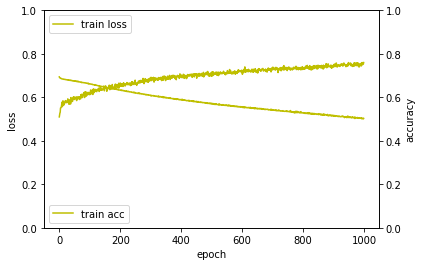

In [22]:
# 학습과정 살펴보기
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])
loss_ax.plot(hist2.history['loss'], 'y', label='train loss')
acc_ax.plot(hist2.history['acc'], 'y', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [23]:
# 모델 평가하기
loss_and_metrics = model2.evaluate(x_test, y_test, batch_size=50)
print('loss_and_metrics : ' + str(loss_and_metrics))

100/100 [==============================] - 0s 491us/step
loss_and_metrics : [0.8561319708824158, 0.5300000011920929]


## 3. 깊은 다층퍼셉트론 신경망 모델

In [24]:
# 모델 구성하기
model3 = Sequential()
model3.add(Dense(64, input_dim=12, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                832       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


In [25]:
# 모델 학습과정 설정
model3.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [26]:
# 모델 학습시키기
hist3 = model3.fit(x_train, y_train, epochs=1000, batch_size=100)

Epoch 1/1000
1000/1000 [==============================] - 0s 237us/step - loss: 0.6973 - acc: 0.4890
Epoch 2/1000
1000/1000 [==============================] - 0s 36us/step - loss: 0.6926 - acc: 0.5250
Epoch 3/1000
1000/1000 [==============================] - 0s 35us/step - loss: 0.6907 - acc: 0.5440
Epoch 4/1000
1000/1000 [==============================] - 0s 34us/step - loss: 0.6881 - acc: 0.5330
Epoch 5/1000
1000/1000 [==============================] - 0s 33us/step - loss: 0.6883 - acc: 0.5300
Epoch 6/1000
1000/1000 [==============================] - 0s 32us/step - loss: 0.6855 - acc: 0.5660
Epoch 7/1000
1000/1000 [==============================] - 0s 36us/step - loss: 0.6849 - acc: 0.5470
Epoch 8/1000
1000/1000 [==============================] - 0s 34us/step - loss: 0.6836 - acc: 0.5830
Epoch 9/1000
1000/1000 [==============================] - 0s 33us/step - loss: 0.6824 - acc: 0.5710
Epoch 10/1000
1000/1000 [==============================] - 0s 38us/step - loss: 0.6824 - acc: 0.564

1000/1000 [==============================] - 0s 42us/step - loss: 0.5134 - acc: 0.7490
Epoch 163/1000
1000/1000 [==============================] - 0s 42us/step - loss: 0.5041 - acc: 0.7640
Epoch 164/1000
1000/1000 [==============================] - 0s 44us/step - loss: 0.5093 - acc: 0.7490
Epoch 165/1000
1000/1000 [==============================] - 0s 42us/step - loss: 0.5078 - acc: 0.7470
Epoch 166/1000
1000/1000 [==============================] - 0s 49us/step - loss: 0.5072 - acc: 0.7520
Epoch 167/1000
1000/1000 [==============================] - 0s 43us/step - loss: 0.5023 - acc: 0.7640
Epoch 168/1000
1000/1000 [==============================] - 0s 41us/step - loss: 0.5036 - acc: 0.7590
Epoch 169/1000
1000/1000 [==============================] - 0s 43us/step - loss: 0.5038 - acc: 0.7660
Epoch 170/1000
1000/1000 [==============================] - 0s 44us/step - loss: 0.5029 - acc: 0.7580
Epoch 171/1000
1000/1000 [==============================] - 0s 43us/step - loss: 0.4978 - acc: 0.

1000/1000 [==============================] - 0s 43us/step - loss: 0.4370 - acc: 0.8110
Epoch 243/1000
1000/1000 [==============================] - 0s 42us/step - loss: 0.4397 - acc: 0.8000
Epoch 244/1000
1000/1000 [==============================] - 0s 43us/step - loss: 0.4422 - acc: 0.8060
Epoch 245/1000
1000/1000 [==============================] - 0s 44us/step - loss: 0.4272 - acc: 0.8080
Epoch 246/1000
1000/1000 [==============================] - 0s 48us/step - loss: 0.4319 - acc: 0.8100
Epoch 247/1000
1000/1000 [==============================] - 0s 41us/step - loss: 0.4282 - acc: 0.8080
Epoch 248/1000
1000/1000 [==============================] - 0s 46us/step - loss: 0.4325 - acc: 0.8290
Epoch 249/1000
1000/1000 [==============================] - 0s 41us/step - loss: 0.4310 - acc: 0.8160
Epoch 250/1000
1000/1000 [==============================] - ETA: 0s - loss: 0.4065 - acc: 0.830 - 0s 41us/step - loss: 0.4258 - acc: 0.8080
Epoch 251/1000
1000/1000 [==============================] -

1000/1000 [==============================] - 0s 40us/step - loss: 0.3634 - acc: 0.8560
Epoch 323/1000
1000/1000 [==============================] - 0s 43us/step - loss: 0.3691 - acc: 0.8530
Epoch 324/1000
1000/1000 [==============================] - 0s 54us/step - loss: 0.3610 - acc: 0.8500
Epoch 325/1000
1000/1000 [==============================] - 0s 43us/step - loss: 0.3710 - acc: 0.8470
Epoch 326/1000
1000/1000 [==============================] - 0s 43us/step - loss: 0.3713 - acc: 0.8450
Epoch 327/1000
1000/1000 [==============================] - 0s 43us/step - loss: 0.3661 - acc: 0.8480
Epoch 328/1000
1000/1000 [==============================] - 0s 42us/step - loss: 0.3642 - acc: 0.8470
Epoch 329/1000
1000/1000 [==============================] - 0s 45us/step - loss: 0.3550 - acc: 0.8570
Epoch 330/1000
1000/1000 [==============================] - 0s 44us/step - loss: 0.3704 - acc: 0.8480
Epoch 331/1000
1000/1000 [==============================] - 0s 50us/step - loss: 0.3653 - acc: 0.

1000/1000 [==============================] - 0s 41us/step - loss: 0.2691 - acc: 0.9060
Epoch 483/1000
1000/1000 [==============================] - 0s 43us/step - loss: 0.2752 - acc: 0.9030
Epoch 484/1000
1000/1000 [==============================] - 0s 42us/step - loss: 0.2651 - acc: 0.9120
Epoch 485/1000
1000/1000 [==============================] - 0s 51us/step - loss: 0.2619 - acc: 0.9070
Epoch 486/1000
1000/1000 [==============================] - 0s 43us/step - loss: 0.2765 - acc: 0.8950
Epoch 487/1000
1000/1000 [==============================] - 0s 41us/step - loss: 0.2715 - acc: 0.9030
Epoch 488/1000
1000/1000 [==============================] - 0s 41us/step - loss: 0.2714 - acc: 0.8930
Epoch 489/1000
1000/1000 [==============================] - 0s 44us/step - loss: 0.2571 - acc: 0.9130
Epoch 490/1000
1000/1000 [==============================] - 0s 41us/step - loss: 0.2728 - acc: 0.8910
Epoch 491/1000
1000/1000 [==============================] - 0s 40us/step - loss: 0.2587 - acc: 0.

1000/1000 [==============================] - 0s 48us/step - loss: 0.1909 - acc: 0.9390
Epoch 643/1000
1000/1000 [==============================] - 0s 44us/step - loss: 0.1749 - acc: 0.9540
Epoch 644/1000
1000/1000 [==============================] - 0s 48us/step - loss: 0.1992 - acc: 0.9330
Epoch 645/1000
1000/1000 [==============================] - 0s 45us/step - loss: 0.1792 - acc: 0.9510
Epoch 646/1000
1000/1000 [==============================] - 0s 46us/step - loss: 0.1893 - acc: 0.9430
Epoch 647/1000
1000/1000 [==============================] - 0s 44us/step - loss: 0.2073 - acc: 0.9220
Epoch 648/1000
1000/1000 [==============================] - 0s 43us/step - loss: 0.1782 - acc: 0.9550
Epoch 649/1000
1000/1000 [==============================] - 0s 48us/step - loss: 0.1754 - acc: 0.9550
Epoch 650/1000
1000/1000 [==============================] - 0s 44us/step - loss: 0.1928 - acc: 0.9400
Epoch 651/1000
1000/1000 [==============================] - 0s 50us/step - loss: 0.1818 - acc: 0.

1000/1000 [==============================] - 0s 51us/step - loss: 0.1196 - acc: 0.9790
Epoch 803/1000
1000/1000 [==============================] - 0s 53us/step - loss: 0.1218 - acc: 0.9680
Epoch 804/1000
1000/1000 [==============================] - 0s 51us/step - loss: 0.1230 - acc: 0.9730
Epoch 805/1000
1000/1000 [==============================] - 0s 51us/step - loss: 0.1227 - acc: 0.9700
Epoch 806/1000
1000/1000 [==============================] - 0s 55us/step - loss: 0.1321 - acc: 0.9660
Epoch 807/1000
1000/1000 [==============================] - 0s 51us/step - loss: 0.1238 - acc: 0.9750
Epoch 808/1000
1000/1000 [==============================] - 0s 48us/step - loss: 0.1232 - acc: 0.9700
Epoch 809/1000
1000/1000 [==============================] - 0s 53us/step - loss: 0.1190 - acc: 0.9800
Epoch 810/1000
1000/1000 [==============================] - 0s 51us/step - loss: 0.1139 - acc: 0.9870
Epoch 811/1000
1000/1000 [==============================] - 0s 52us/step - loss: 0.1396 - acc: 0.

1000/1000 [==============================] - 0s 47us/step - loss: 0.0727 - acc: 0.9910
Epoch 963/1000
1000/1000 [==============================] - 0s 50us/step - loss: 0.0845 - acc: 0.9870
Epoch 964/1000
1000/1000 [==============================] - 0s 50us/step - loss: 0.0753 - acc: 0.9900
Epoch 965/1000
1000/1000 [==============================] - 0s 44us/step - loss: 0.0944 - acc: 0.9800
Epoch 966/1000
1000/1000 [==============================] - 0s 47us/step - loss: 0.0679 - acc: 0.9960
Epoch 967/1000
1000/1000 [==============================] - 0s 47us/step - loss: 0.0981 - acc: 0.9740
Epoch 968/1000
1000/1000 [==============================] - 0s 45us/step - loss: 0.0717 - acc: 0.9940
Epoch 969/1000
1000/1000 [==============================] - 0s 49us/step - loss: 0.0689 - acc: 0.9940
Epoch 970/1000
1000/1000 [==============================] - 0s 48us/step - loss: 0.0848 - acc: 0.9880
Epoch 971/1000
1000/1000 [==============================] - 0s 46us/step - loss: 0.0936 - acc: 0.

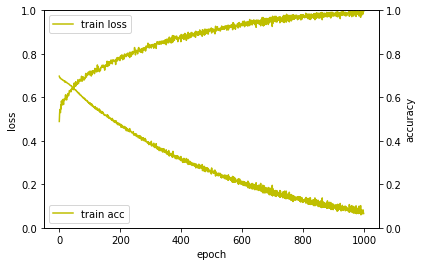

In [27]:
# 학습과정 살펴보기
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])
loss_ax.plot(hist3.history['loss'], 'y', label='train loss')
acc_ax.plot(hist3.history['acc'], 'y', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [28]:
# 모델 평가하기
loss_and_metrics = model3.evaluate(x_test, y_test, batch_size=50)
print('loss_and_metrics : ' + str(loss_and_metrics))

100/100 [==============================] - 0s 704us/step
loss_and_metrics : [2.7602946758270264, 0.46000000834465027]
